In [6]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/my_drive/')

Mounted at /content/my_drive/


In [4]:
cd /content/my_drive/MyDrive/INVESTIGACION/I2A2-2021/

/content/my_drive/MyDrive/INVESTIGACION/I2A2-2021


In [5]:
PATH_DATASET = 'Challenge_Data'

In [89]:
def get_previous(df,window):
    band = False
    columns= ['Cycle','OpSet1', 'OpSet2', 'OpSet3', 
              'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
              'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 
              'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
              'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']

    for i in range(1,window):

        df1 = df[['ID','Cycle']].add_suffix('').join(df[columns].shift(i).add_suffix('_-t'+str(i)))

        if band:
            agregation = pd.merge(agregation, df1, on=["ID","Cycle"])
        else:
            agregation = df1
        band = True
    agregation.replace([np.inf, -np.inf,np.nan],0 , inplace=True)
    return agregation

In [90]:
def transform_data(df):
  df = df[[f for f in range(0,26)]]
  df.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
  df = get_previous(df,4)
  
  max_cycles_df = df.groupby(['ID'], sort=False)['Cycle'].max().reset_index().rename(columns={'Cycle':'MaxCycleID'})
  

  FD001_df = pd.merge(df, max_cycles_df, how='inner', on='ID')

  FD001_df['RUL'] = FD001_df['MaxCycleID'] - FD001_df['Cycle']
  
  

  return FD001_df


In [91]:
df_train = pd.read_csv(os.path.join(PATH_DATASET,'train.txt'), sep=" ", header=None)
df_train = transform_data(df_train)
df_train.head()

,ID,Cycle,Cycle_-t1,OpSet1_-t1,OpSet2_-t1,OpSet3_-t1,SensorMeasure1_-t1,SensorMeasure2_-t1,SensorMeasure3_-t1,SensorMeasure4_-t1,SensorMeasure5_-t1,SensorMeasure6_-t1,SensorMeasure7_-t1,SensorMeasure8_-t1,SensorMeasure9_-t1,SensorMeasure10_-t1,SensorMeasure11_-t1,SensorMeasure12_-t1,SensorMeasure13_-t1,SensorMeasure14_-t1,SensorMeasure15_-t1,SensorMeasure16_-t1,SensorMeasure17_-t1,SensorMeasure18_-t1,SensorMeasure19_-t1,SensorMeasure20_-t1,SensorMeasure21_-t1,Cycle_-t2,OpSet1_-t2,OpSet2_-t2,OpSet3_-t2,SensorMeasure1_-t2,SensorMeasure2_-t2,SensorMeasure3_-t2,SensorMeasure4_-t2,SensorMeasure5_-t2,SensorMeasure6_-t2,SensorMeasure7_-t2,SensorMeasure8_-t2,SensorMeasure9_-t2,SensorMeasure10_-t2,SensorMeasure11_-t2,SensorMeasure12_-t2,SensorMeasure13_-t2,SensorMeasure14_-t2,SensorMeasure15_-t2,SensorMeasure16_-t2,SensorMeasure17_-t2,SensorMeasure18_-t2,SensorMeasure19_-t2,SensorMeasure20_-t2,SensorMeasure21_-t2,Cycle_-t3,OpSet1_-t3,OpSet2_-t3,OpSet3_-t3,SensorMeasure1_-t3,SensorMeasure2_-t3,SensorMeasure3_-t3,SensorMeasure4_-t3,SensorMeasure5_-t3,SensorMeasure6_-t3,SensorMeasure7_-t3,SensorMeasure8_-t3,SensorMeasure9_-t3,SensorMeasure10_-t3,SensorMeasure11_-t3,SensorMeasure12_-t3,SensorMeasure13_-t3,SensorMeasure14_-t3,SensorMeasure15_-t3,SensorMeasure16_-t3,SensorMeasure17_-t3,SensorMeasure18_-t3,SensorMeasure19_-t3,SensorMeasure20_-t3,SensorMeasure21_-t3,MaxCycleID,RUL
0,1,1,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,223,222
1,1,2,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,223,221
2,1,3,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,223,220
3,1,4,3.0,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334.0,2223.0,100.0,14.83,8.8555,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735,223,219
4,1,5,4.0,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364.0,2324.0,100.0,24.42,14.7832,3.0,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334.0,2223.0,100.0,14.83,8.8555,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619,223,218


In [92]:
df_train[df_train['ID'] == 1].head()


,ID,Cycle,Cycle_-t1,OpSet1_-t1,OpSet2_-t1,OpSet3_-t1,SensorMeasure1_-t1,SensorMeasure2_-t1,SensorMeasure3_-t1,SensorMeasure4_-t1,SensorMeasure5_-t1,SensorMeasure6_-t1,SensorMeasure7_-t1,SensorMeasure8_-t1,SensorMeasure9_-t1,SensorMeasure10_-t1,SensorMeasure11_-t1,SensorMeasure12_-t1,SensorMeasure13_-t1,SensorMeasure14_-t1,SensorMeasure15_-t1,SensorMeasure16_-t1,SensorMeasure17_-t1,SensorMeasure18_-t1,SensorMeasure19_-t1,SensorMeasure20_-t1,SensorMeasure21_-t1,Cycle_-t2,OpSet1_-t2,OpSet2_-t2,OpSet3_-t2,SensorMeasure1_-t2,SensorMeasure2_-t2,SensorMeasure3_-t2,SensorMeasure4_-t2,SensorMeasure5_-t2,SensorMeasure6_-t2,SensorMeasure7_-t2,SensorMeasure8_-t2,SensorMeasure9_-t2,SensorMeasure10_-t2,SensorMeasure11_-t2,SensorMeasure12_-t2,SensorMeasure13_-t2,SensorMeasure14_-t2,SensorMeasure15_-t2,SensorMeasure16_-t2,SensorMeasure17_-t2,SensorMeasure18_-t2,SensorMeasure19_-t2,SensorMeasure20_-t2,SensorMeasure21_-t2,Cycle_-t3,OpSet1_-t3,OpSet2_-t3,OpSet3_-t3,SensorMeasure1_-t3,SensorMeasure2_-t3,SensorMeasure3_-t3,SensorMeasure4_-t3,SensorMeasure5_-t3,SensorMeasure6_-t3,SensorMeasure7_-t3,SensorMeasure8_-t3,SensorMeasure9_-t3,SensorMeasure10_-t3,SensorMeasure11_-t3,SensorMeasure12_-t3,SensorMeasure13_-t3,SensorMeasure14_-t3,SensorMeasure15_-t3,SensorMeasure16_-t3,SensorMeasure17_-t3,SensorMeasure18_-t3,SensorMeasure19_-t3,SensorMeasure20_-t3,SensorMeasure21_-t3,MaxCycleID,RUL
0,1,1,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,223,222
1,1,2,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,223,221
2,1,3,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,223,220
3,1,4,3.0,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334.0,2223.0,100.0,14.83,8.8555,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619,1.0,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368.0,2319.0,100.0,28.58,17.1735,223,219
4,1,5,4.0,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364.0,2324.0,100.0,24.42,14.7832,3.0,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334.0,2223.0,100.0,14.83,8.8555,2.0,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391.0,2388.0,100.0,38.99,23.3619,223,218


In [93]:
df_train[df_train['ID'] == 1]['Cycle']

0        1
1        2
2        3
3        4
4        5
      ... 
218    219
219    220
220    221
221    222
222    223
Name: Cycle, Length: 223, dtype: int64

In [94]:
df_test = pd.read_csv(os.path.join(PATH_DATASET,'test.txt'), sep=" ", header=None)
df_test = transform_data(df_test)

df_test.head()

,ID,Cycle,Cycle_-t1,OpSet1_-t1,OpSet2_-t1,OpSet3_-t1,SensorMeasure1_-t1,SensorMeasure2_-t1,SensorMeasure3_-t1,SensorMeasure4_-t1,SensorMeasure5_-t1,SensorMeasure6_-t1,SensorMeasure7_-t1,SensorMeasure8_-t1,SensorMeasure9_-t1,SensorMeasure10_-t1,SensorMeasure11_-t1,SensorMeasure12_-t1,SensorMeasure13_-t1,SensorMeasure14_-t1,SensorMeasure15_-t1,SensorMeasure16_-t1,SensorMeasure17_-t1,SensorMeasure18_-t1,SensorMeasure19_-t1,SensorMeasure20_-t1,SensorMeasure21_-t1,Cycle_-t2,OpSet1_-t2,OpSet2_-t2,OpSet3_-t2,SensorMeasure1_-t2,SensorMeasure2_-t2,SensorMeasure3_-t2,SensorMeasure4_-t2,SensorMeasure5_-t2,SensorMeasure6_-t2,SensorMeasure7_-t2,SensorMeasure8_-t2,SensorMeasure9_-t2,SensorMeasure10_-t2,SensorMeasure11_-t2,SensorMeasure12_-t2,SensorMeasure13_-t2,SensorMeasure14_-t2,SensorMeasure15_-t2,SensorMeasure16_-t2,SensorMeasure17_-t2,SensorMeasure18_-t2,SensorMeasure19_-t2,SensorMeasure20_-t2,SensorMeasure21_-t2,Cycle_-t3,OpSet1_-t3,OpSet2_-t3,OpSet3_-t3,SensorMeasure1_-t3,SensorMeasure2_-t3,SensorMeasure3_-t3,SensorMeasure4_-t3,SensorMeasure5_-t3,SensorMeasure6_-t3,SensorMeasure7_-t3,SensorMeasure8_-t3,SensorMeasure9_-t3,SensorMeasure10_-t3,SensorMeasure11_-t3,SensorMeasure12_-t3,SensorMeasure13_-t3,SensorMeasure14_-t3,SensorMeasure15_-t3,SensorMeasure16_-t3,SensorMeasure17_-t3,SensorMeasure18_-t3,SensorMeasure19_-t3,SensorMeasure20_-t3,SensorMeasure21_-t3,MaxCycleID,RUL
0,1,1,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.0000,54,53
1,1,2,1.0,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393.0,2388.0,100.00,38.97,23.3029,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.0000,54,52
2,1,3,2.0,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308.0,1915.0,84.93,14.29,8.6686,1.0,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393.0,2388.0,100.00,38.97,23.3029,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.0000,54,51
3,1,4,3.0,0.0004,0.0000,100.0,518.67,642.65,1589.75,1409.54,14.62,21.61,554.31,2388.18,9037.61,1.30,47.49,521.15,2388.19,8121.12,8.4620,0.03,393.0,2388.0,100.00,38.91,23.2693,2.0,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308.0,1915.0,84.93,14.29,8.6686,1.0,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393.0,2388.0,100.00,38.97,23.3029,54,50
4,1,5,4.0,10.0034,0.2500,20.0,489.05,604.44,1499.93,1315.34,10.52,15.49,393.88,2318.94,8761.83,1.26,45.41,371.42,2388.21,8123.53,8.6815,0.03,369.0,2319.0,100.00,28.60,17.0930,3.0,0.0004,0.0000,100.0,518.67,642.65,1589.75,1409.54,14.62,21.61,554.31,2388.18,9037.61,1.30,47.49,521.15,2388.19,8121.12,8.4620,0.03,393.0,2388.0,100.00,38.91,23.2693,2.0,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308.0,1915.0,84.93,14.29,8.6686,54,49


In [95]:
df_test[df_test['ID'] == 1].head(3)


,ID,Cycle,Cycle_-t1,OpSet1_-t1,OpSet2_-t1,OpSet3_-t1,SensorMeasure1_-t1,SensorMeasure2_-t1,SensorMeasure3_-t1,SensorMeasure4_-t1,SensorMeasure5_-t1,SensorMeasure6_-t1,SensorMeasure7_-t1,SensorMeasure8_-t1,SensorMeasure9_-t1,SensorMeasure10_-t1,SensorMeasure11_-t1,SensorMeasure12_-t1,SensorMeasure13_-t1,SensorMeasure14_-t1,SensorMeasure15_-t1,SensorMeasure16_-t1,SensorMeasure17_-t1,SensorMeasure18_-t1,SensorMeasure19_-t1,SensorMeasure20_-t1,SensorMeasure21_-t1,Cycle_-t2,OpSet1_-t2,OpSet2_-t2,OpSet3_-t2,SensorMeasure1_-t2,SensorMeasure2_-t2,SensorMeasure3_-t2,SensorMeasure4_-t2,SensorMeasure5_-t2,SensorMeasure6_-t2,SensorMeasure7_-t2,SensorMeasure8_-t2,SensorMeasure9_-t2,SensorMeasure10_-t2,SensorMeasure11_-t2,SensorMeasure12_-t2,SensorMeasure13_-t2,SensorMeasure14_-t2,SensorMeasure15_-t2,SensorMeasure16_-t2,SensorMeasure17_-t2,SensorMeasure18_-t2,SensorMeasure19_-t2,SensorMeasure20_-t2,SensorMeasure21_-t2,Cycle_-t3,OpSet1_-t3,OpSet2_-t3,OpSet3_-t3,SensorMeasure1_-t3,SensorMeasure2_-t3,SensorMeasure3_-t3,SensorMeasure4_-t3,SensorMeasure5_-t3,SensorMeasure6_-t3,SensorMeasure7_-t3,SensorMeasure8_-t3,SensorMeasure9_-t3,SensorMeasure10_-t3,SensorMeasure11_-t3,SensorMeasure12_-t3,SensorMeasure13_-t3,SensorMeasure14_-t3,SensorMeasure15_-t3,SensorMeasure16_-t3,SensorMeasure17_-t3,SensorMeasure18_-t3,SensorMeasure19_-t3,SensorMeasure20_-t3,SensorMeasure21_-t3,MaxCycleID,RUL
0,1,1,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,53
1,1,2,1.0,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393.0,2388.0,100.00,38.97,23.3029,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,52
2,1,3,2.0,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308.0,1915.0,84.93,14.29,8.6686,1.0,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.3,47.57,521.44,2388.1,8124.04,8.4363,0.03,393.0,2388.0,100.0,38.97,23.3029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,51


In [96]:
df_final_test = pd.read_csv(os.path.join(PATH_DATASET,'final_test.txt'), sep=" ", header=None)
df_final_test = transform_data(df_final_test)


In [97]:
print(df_final_test[df_final_test['ID'] == 1].shape)
df_final_test[df_final_test['ID'] == 1].head()


(142, 79)


,ID,Cycle,Cycle_-t1,OpSet1_-t1,OpSet2_-t1,OpSet3_-t1,SensorMeasure1_-t1,SensorMeasure2_-t1,SensorMeasure3_-t1,SensorMeasure4_-t1,SensorMeasure5_-t1,SensorMeasure6_-t1,SensorMeasure7_-t1,SensorMeasure8_-t1,SensorMeasure9_-t1,SensorMeasure10_-t1,SensorMeasure11_-t1,SensorMeasure12_-t1,SensorMeasure13_-t1,SensorMeasure14_-t1,SensorMeasure15_-t1,SensorMeasure16_-t1,SensorMeasure17_-t1,SensorMeasure18_-t1,SensorMeasure19_-t1,SensorMeasure20_-t1,SensorMeasure21_-t1,Cycle_-t2,OpSet1_-t2,OpSet2_-t2,OpSet3_-t2,SensorMeasure1_-t2,SensorMeasure2_-t2,SensorMeasure3_-t2,SensorMeasure4_-t2,SensorMeasure5_-t2,SensorMeasure6_-t2,SensorMeasure7_-t2,SensorMeasure8_-t2,SensorMeasure9_-t2,SensorMeasure10_-t2,SensorMeasure11_-t2,SensorMeasure12_-t2,SensorMeasure13_-t2,SensorMeasure14_-t2,SensorMeasure15_-t2,SensorMeasure16_-t2,SensorMeasure17_-t2,SensorMeasure18_-t2,SensorMeasure19_-t2,SensorMeasure20_-t2,SensorMeasure21_-t2,Cycle_-t3,OpSet1_-t3,OpSet2_-t3,OpSet3_-t3,SensorMeasure1_-t3,SensorMeasure2_-t3,SensorMeasure3_-t3,SensorMeasure4_-t3,SensorMeasure5_-t3,SensorMeasure6_-t3,SensorMeasure7_-t3,SensorMeasure8_-t3,SensorMeasure9_-t3,SensorMeasure10_-t3,SensorMeasure11_-t3,SensorMeasure12_-t3,SensorMeasure13_-t3,SensorMeasure14_-t3,SensorMeasure15_-t3,SensorMeasure16_-t3,SensorMeasure17_-t3,SensorMeasure18_-t3,SensorMeasure19_-t3,SensorMeasure20_-t3,SensorMeasure21_-t3,MaxCycleID,RUL
0,1,1,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,142,141
1,1,2,1.0,10.0047,0.2501,20.0,489.05,605.02,1498.72,1304.90,10.52,15.49,394.90,2318.93,8770.87,1.26,45.47,371.83,2388.12,8128.58,8.6402,0.03,371.0,2319.0,100.0,28.52,17.0653,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,142,140
2,1,3,2.0,0.0015,0.0003,100.0,518.67,642.69,1592.90,1405.35,14.62,21.61,554.15,2388.03,9046.61,1.30,47.46,521.88,2388.09,8128.07,8.4286,0.03,392.0,2388.0,100.0,38.95,23.3609,1.0,10.0047,0.2501,20.0,489.05,605.02,1498.72,1304.90,10.52,15.49,394.90,2318.93,8770.87,1.26,45.47,371.83,2388.12,8128.58,8.6402,0.03,371.0,2319.0,100.0,28.52,17.0653,0.0,0.0000,0.0000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.0000,142,139
3,1,4,3.0,34.9986,0.8401,60.0,449.44,555.49,1357.71,1127.52,5.48,8.00,194.57,2222.86,8340.55,1.02,41.80,182.97,2387.92,8060.07,9.3065,0.02,333.0,2223.0,100.0,14.91,8.8185,2.0,0.0015,0.0003,100.0,518.67,642.69,1592.90,1405.35,14.62,21.61,554.15,2388.03,9046.61,1.30,47.46,521.88,2388.09,8128.07,8.4286,0.03,392.0,2388.0,100.0,38.95,23.3609,1.0,10.0047,0.2501,20.0,489.05,605.02,1498.72,1304.90,10.52,15.49,394.90,2318.93,8770.87,1.26,45.47,371.83,2388.12,8128.58,8.6402,0.03,371.0,2319.0,100.0,28.52,17.0653,142,138
4,1,5,4.0,20.0031,0.7005,0.0,491.19,607.62,1479.86,1257.25,9.35,13.65,334.19,2323.95,8721.01,1.07,44.22,315.29,2388.09,8060.00,9.2381,0.02,365.0,2324.0,100.0,24.35,14.7075,3.0,34.9986,0.8401,60.0,449.44,555.49,1357.71,1127.52,5.48,8.00,194.57,2222.86,8340.55,1.02,41.80,182.97,2387.92,8060.07,9.3065,0.02,333.0,2223.0,100.0,14.91,8.8185,2.0,0.0015,0.0003,100.0,518.67,642.69,1592.90,1405.35,14.62,21.61,554.15,2388.03,9046.61,1.30,47.46,521.88,2388.09,8128.07,8.4286,0.03,392.0,2388.0,100.0,38.95,23.3609,142,137


In [98]:
X_train = df_train.drop(columns=['RUL'])
y_train = df_train['RUL']

X_val = df_test.drop(columns=['RUL'])
y_val = df_test['RUL']

X_test = df_final_test.drop(columns=['RUL'])
y_test = df_final_test['RUL']


In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

In [100]:
import lightgbm as lgb


In [101]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 8000
}

In [102]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [103]:
gbm.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        early_stopping_rounds=100)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 50.541	valid_0's l2: 3544.08	valid_0's rmse: 59.5322
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 46.7959	valid_0's l2: 3044.85	valid_0's rmse: 55.1802
[3]	valid_0's l1: 43.4322	valid_0's l2: 2635.82	valid_0's rmse: 51.3402
[4]	valid_0's l1: 40.251	valid_0's l2: 2288.25	valid_0's rmse: 47.8356
[5]	valid_0's l1: 37.3292	valid_0's l2: 1995.29	valid_0's rmse: 44.6686
[6]	valid_0's l1: 34.7925	valid_0's l2: 1763.31	valid_0's rmse: 41.9918
[7]	valid_0's l1: 32.3985	valid_0's l2: 1563.24	valid_0's rmse: 39.5379
[8]	valid_0's l1: 30.2931	valid_0's l2: 1402.9	valid_0's rmse: 37.4552
[9]	valid_0's l1: 28.3848	valid_0's l2: 1269.56	valid_0's rmse: 35.6308
[10]	valid_0's l1: 26.6321	valid_0's l2: 1156.41	valid_0's rmse: 34.006
[11]	valid_0's l1: 25.069	valid_0's l2: 1065.45	valid_0's rmse: 32.6412
[12]	valid_0's l1: 23.6661	valid_0's l2: 989.735	valid_0's rmse: 31.4601
[13]	valid_0's l1: 22.3793	valid_0's l2: 924.899	valid_0's rmse: 30.4121
[1

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              max_bin=512, max_depth=8, metric=['l1', 'l2'],
              num_iterations=8000, num_leaves=128, objective='regression',
              task='train', verbose=0)

In [118]:
_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
df_final_test['pred_RUL'] =_pred

In [107]:
df_final_test['pred_RUL'].to_csv('prediction_01.txt', header=None, index=None, sep=' ', mode='a')

In [112]:
df_final_test[['RUL','pred_RUL']].head()

,RUL,pred_RUL
0,141,145.738813
1,140,142.378960
2,139,140.485643
3,138,139.090304
4,137,138.553734


In [113]:
a1 = 13
a2 = 10

def evaluate(df_original):
  df = df_original.copy()
  df['d'] = df['pred_RUL']-df['RUL']
  df['band_d'] = df['d']<0
  df['score'] = 0
  df['score'][df['band_d']] = np.exp(-df['d']/a1)-1
  df['score'][~df['band_d']] = np.exp(df['d']/a2)-1
  
  return df['score'].mean()


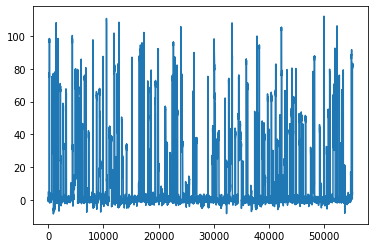

In [114]:
error = df_final_test['pred_RUL']-df_final_test['RUL']
plt.plot(error)
plt.show()

In [120]:
_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
df_train['pred_RUL'] =_pred

_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration_)
df_test['pred_RUL'] =_pred

_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
df_final_test['pred_RUL'] =_pred


In [121]:
df_train_wieghted_sum = evaluate(df_train)
df_val_wieghted_sum = evaluate(df_test)
df_test_wieghted_sum = evaluate(df_final_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/u

In [126]:
from sklearn.metrics import mean_squared_error
df_train_rmse = mean_squared_error(df_train['pred_RUL'],df_train['RUL'], squared=False)
df_test_rmse = mean_squared_error(df_test['pred_RUL'],df_test['RUL'], squared=False)
df_val_rmse = mean_squared_error(df_final_test['pred_RUL'],df_final_test['RUL'], squared=False)

print('Final score mean_squared_error')
print('Score train:',df_train_rmse)
print('Score val  :',df_test_rmse)
print('Score test :',df_val_rmse)

Final score mean_squared_error
Score train: 0.5105372820241111
Score val  : 21.880485082154053
Score test : 26.604134118364804


In [124]:
print('Final score weighted sum of RUL errors by NASA')
print('Score train:',df_train_wieghted_sum)
print('Score val  :',df_val_wieghted_sum)
print('Score test :',df_test_wieghted_sum)

Final score weighted sum of RUL errors by NASA
Score train: 0.03570006206977605
Score val  : 306.382531242489
Score test : 398.9140748291075
